In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats

In [142]:
data = pd.read_csv('cubic_zirconia.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
data.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [10]:
data.shape

(26967, 11)

In [11]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [13]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [15]:
duplicate=data.duplicated()
duplicate.sum()

0

In [16]:
data[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

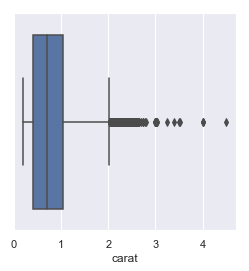

In [34]:
sns.set(rc={'figure.figsize':(4,4)})
sns.boxplot(data['carat'])

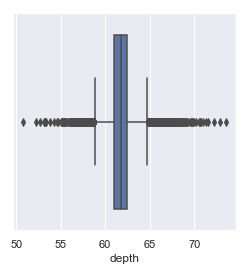

In [35]:
sns.set(rc={'figure.figsize':(4,4)})
sns.boxplot(data['depth'])

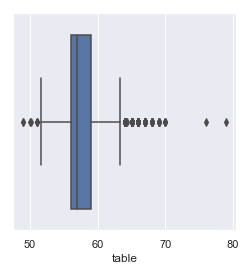

In [36]:
sns.set(rc={'figure.figsize':(4,4)})
sns.boxplot(data['table'])

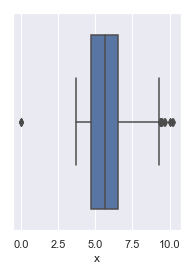

In [37]:
sns.set(rc={'figure.figsize':(3,4)})
sns.boxplot(data['x'])

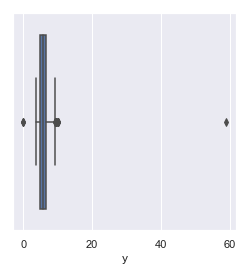

In [39]:
sns.set(rc={'figure.figsize':(4,4)})
sns.boxplot(data['y'])

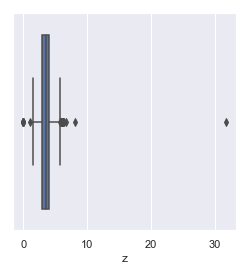

In [40]:
sns.set(rc={'figure.figsize':(4,4)})
sns.boxplot(data['z'])

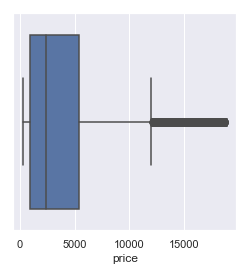

In [41]:
sns.set(rc={'figure.figsize':(4,4)})
sns.boxplot(data['price'])

In [42]:
data.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

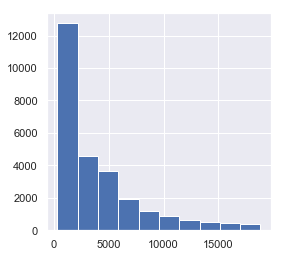

In [44]:
plt.hist(data.price, bins = 10)
plt.show()

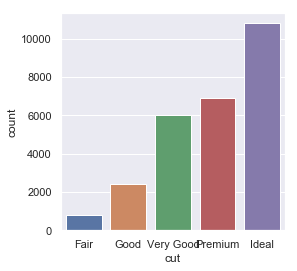

In [46]:
sns.countplot(data['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

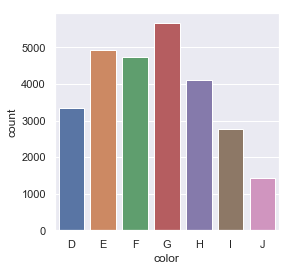

In [48]:
sns.countplot(data['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

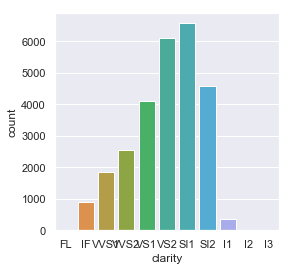

In [60]:
sns.countplot(data['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

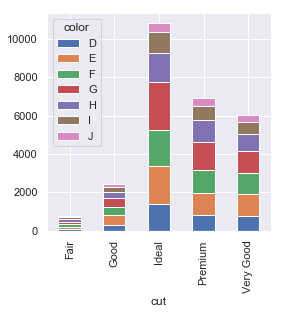

In [61]:
pd.crosstab(data['cut'], data['color']).plot(kind = 'bar', stacked = True)

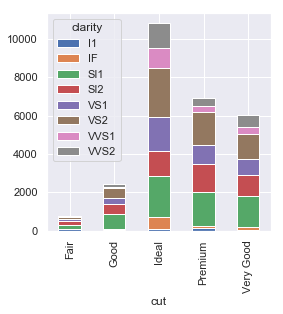

In [62]:
pd.crosstab(data['cut'], data['clarity']).plot(kind = 'bar', stacked = True)

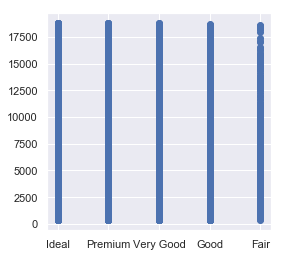

In [63]:
plt.scatter(data['cut'], data['price'])
plt.show()

C:\Users\Moni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


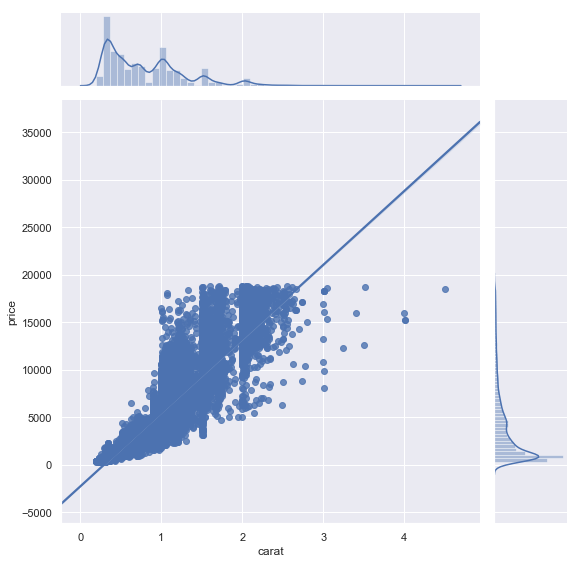

In [74]:
a = sns.jointplot('carat', 'price', data = data, kind='reg', height=8)
plt.show()

C:\Users\Moni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


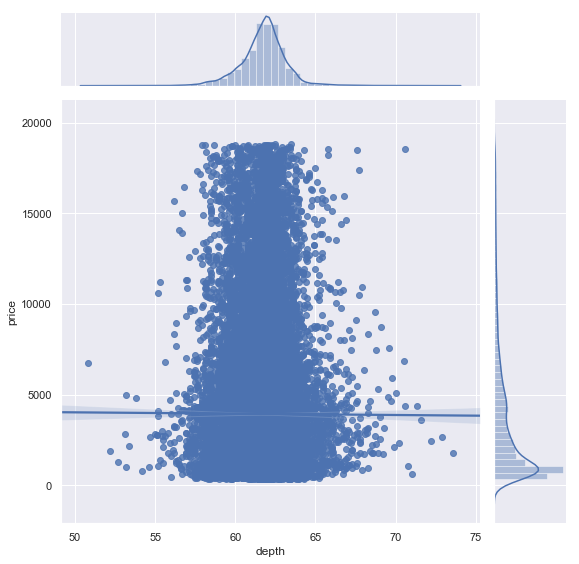

In [75]:
b = sns.jointplot('depth', 'price', data = data, kind='reg', height=8)
plt.show()

C:\Users\Moni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


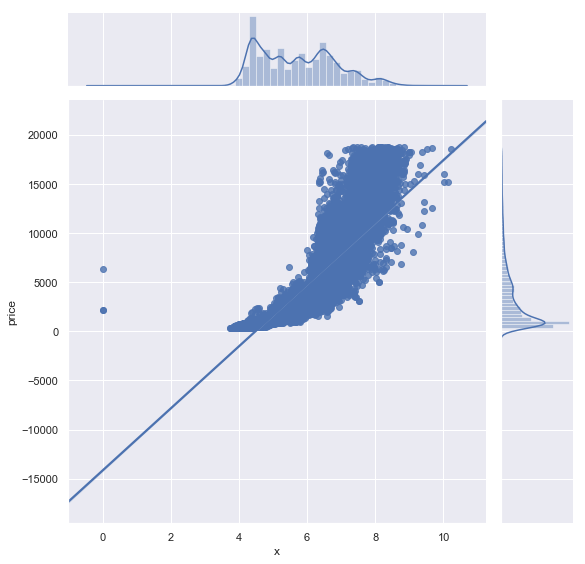

In [76]:
c = sns.jointplot('x', 'price', data = data, kind='reg', height=8)
plt.show()

C:\Users\Moni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


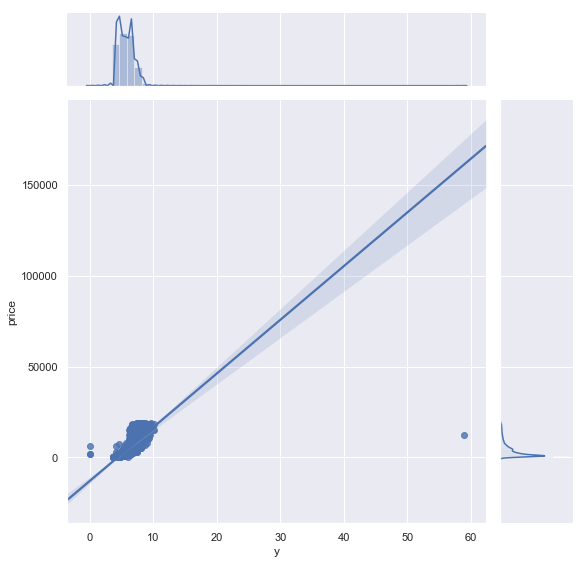

In [77]:
d = sns.jointplot('y', 'price', data = data, kind='reg', height=8)
plt.show()

C:\Users\Moni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


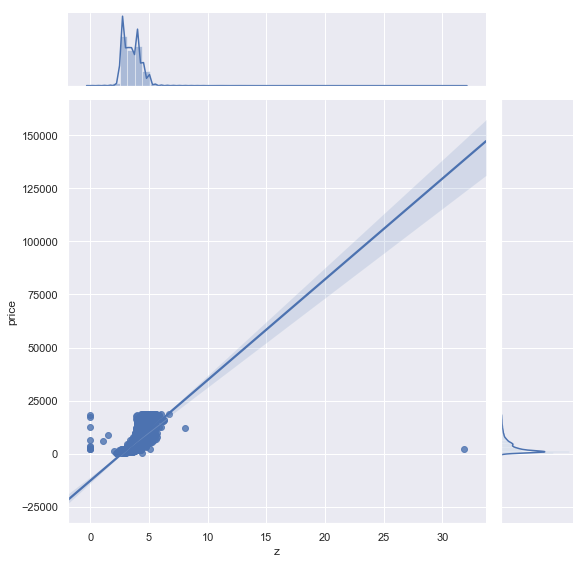

In [78]:
e = sns.jointplot('z', 'price', data = data, kind='reg', height=8)
plt.show()

C:\Users\Moni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


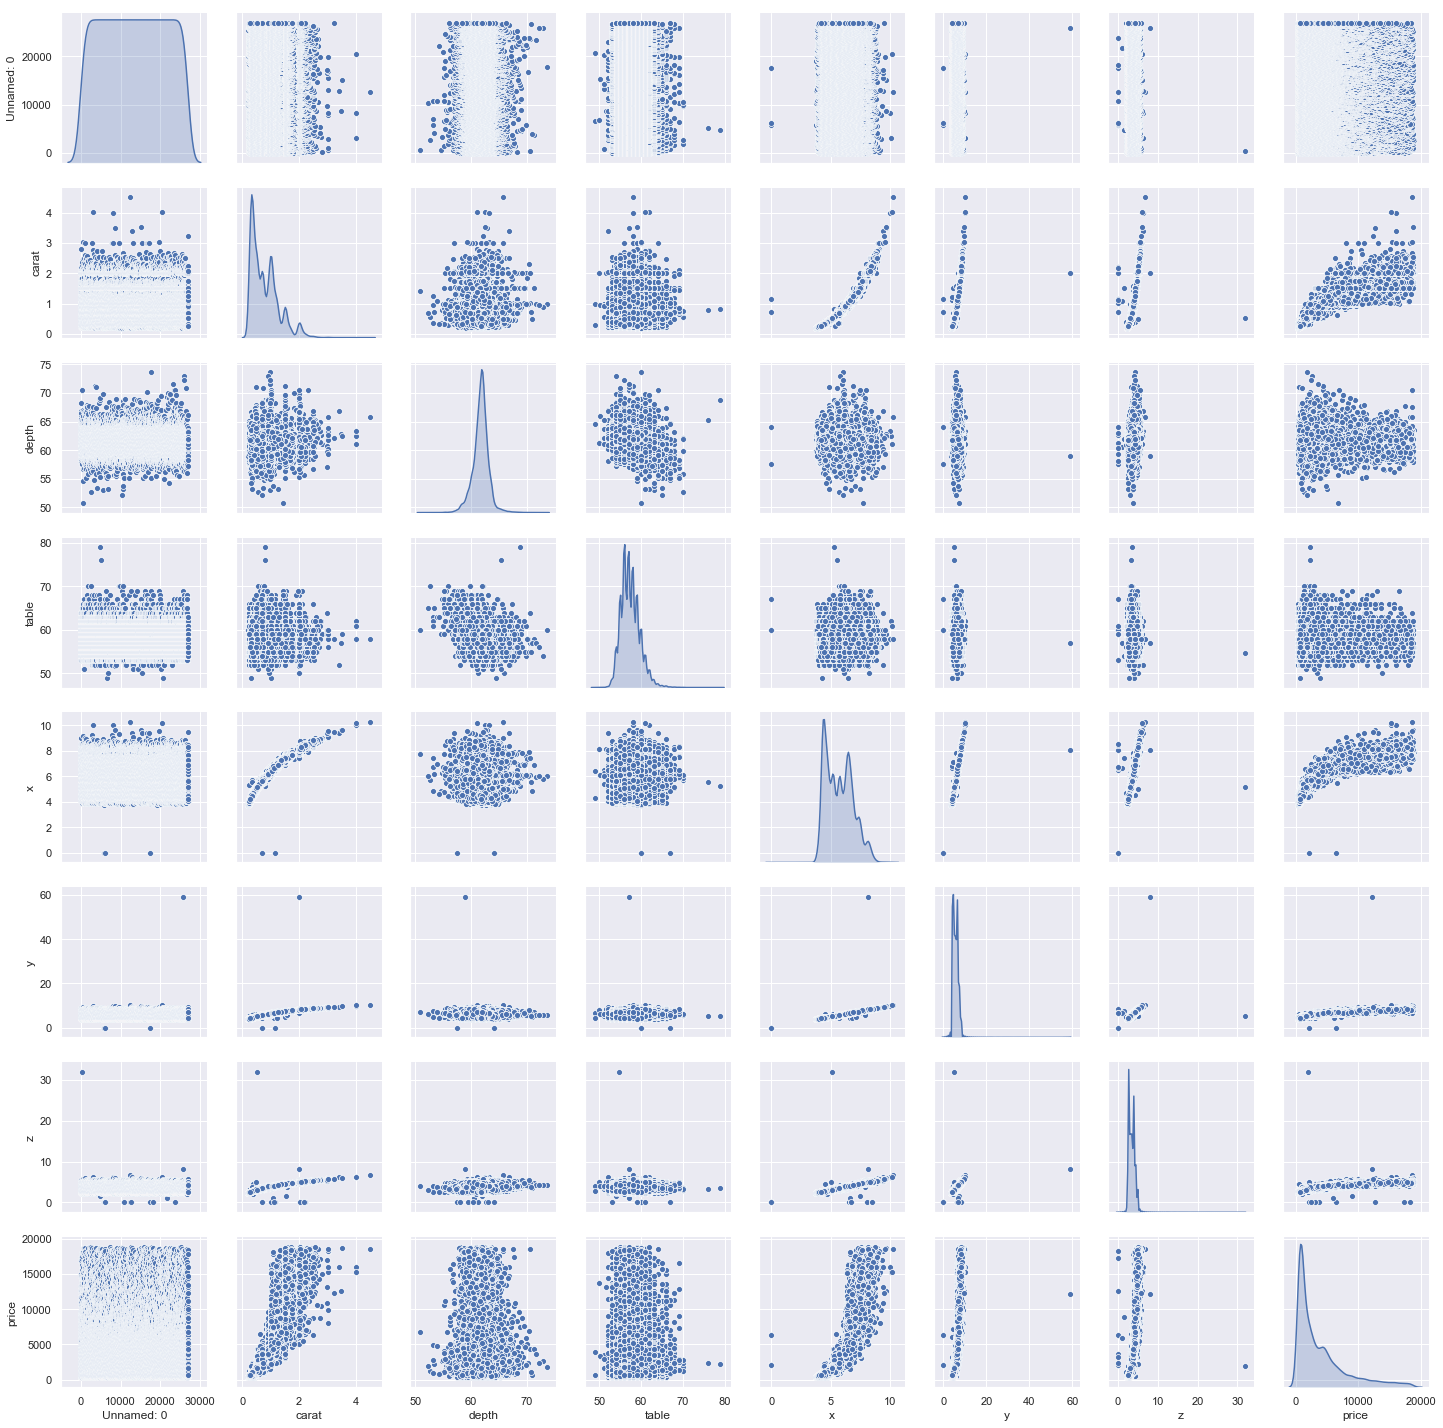

In [80]:
sns.pairplot(data, diag_kind='kde')  
plt.show()

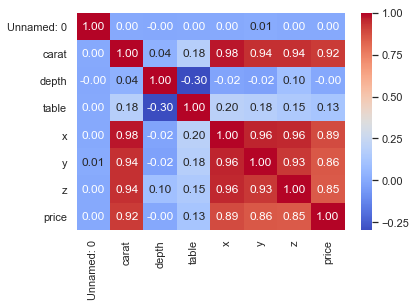

In [83]:
cor = data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [108]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [109]:
data.loc[((data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [110]:
data.drop(data[((data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0))].index, inplace=True)

In [111]:
for column in data.columns:
    if data[column].dtype != 'object':
        median = data[column].median()
        data[column] = data[column].fillna(median)    
        
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26958 non-null  int64  
 1   carat       26958 non-null  float64
 2   cut         26958 non-null  object 
 3   color       26958 non-null  object 
 4   clarity     26958 non-null  object 
 5   depth       26958 non-null  float64
 6   table       26958 non-null  float64
 7   x           26958 non-null  float64
 8   y           26958 non-null  float64
 9   z           26958 non-null  float64
 10  price       26958 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.5+ MB


In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_num = data.select_dtypes(exclude=['object'])
data[data_num.columns] = sc.fit_transform(data_num)

In [143]:
data1 = pd.get_dummies(data, columns=['cut','color','clarity'],drop_first=True)
data1.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,...,0,0,0,0,0,0,0,0,1,0


In [116]:
data1.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [117]:
model = data1.drop(columns=['Unnamed: 0'], axis=1)
model.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [145]:
x = model.drop('price', axis=1)
y = model[['price']]
x.head(5)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [121]:
x.shape
y.shape

(26958, 23)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
for i, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][i]))

The coefficient for carat is 1.367270935949181
The coefficient for depth is -0.027157297781958373
The coefficient for table is -0.015129062503321838
The coefficient for x is -0.3109893370891072
The coefficient for y is -0.0008718302715271618
The coefficient for z is -0.009459310770526735
The coefficient for cut_Good is 0.13136322591216146
The coefficient for cut_Ideal is 0.19405082192916592
The coefficient for cut_Premium is 0.1695361974418688
The coefficient for cut_Very Good is 0.1637510414681501
The coefficient for color_E is -0.045829921106505064
The coefficient for color_F is -0.06423152006658801
The coefficient for color_G is -0.10934322364634387
The coefficient for color_H is -0.23735034810633143
The coefficient for color_I is -0.3612269499771003
The coefficient for color_J is -0.5838191499347688
The coefficient for clarity_IF is 1.289947139967373
The coefficient for clarity_SI1 is 0.8895287879225809
The coefficient for clarity_SI2 is 0.6446204697130651
The coefficient for clari

In [125]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.9907889549988897


In [127]:
regression_model.score(x_train, y_train)

0.9232445774547248

In [128]:
regression_model.score(x_test, y_test)

0.9171155258688372

In [129]:
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.274480473337745

In [130]:
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.29399280117472737

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 25.485885004032028
depth ---> 1.5799537095045701
table ---> 1.7385495006353093
x ---> 48.735020135958294
y ---> 13.932118782114511
z ---> 16.131522272857556
cut_Good ---> 3.530404090036462
cut_Ideal ---> 14.62595830897545
cut_Premium ---> 8.74120100324553
cut_Very Good ---> 7.749342872170176
color_E ---> 2.3694860075909174


In [135]:
train = pd.concat([x_train, y_train], axis=1)
train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = train).fit()
lm1.params

Intercept       -0.990789
carat            1.367271
depth           -0.027157
table           -0.015129
x               -0.310989
y               -0.000872
z               -0.009459
cut_Good         0.131363
cut_Ideal        0.194051
cut_Premium      0.169536
cut_Very_Good    0.163751
color_E         -0.045830
color_F         -0.064232
color_G         -0.109343
color_H         -0.237350
color_I         -0.361227
color_J         -0.583819
clarity_IF       1.289947
clarity_SI1      0.889529
clarity_SI2      0.644620
clarity_VS1      1.111858
clarity_VS2      1.038404
clarity_VVS1     1.215151
clarity_VVS2     1.197715
dtype: float64

In [136]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     9856.
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:16:08   Log-Likelihood:                -2378.8
No. Observations:               18870   AIC:                             4806.
Df Residuals:                   18846   BIC:                             4994.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9908      0.021    -46.438

In [138]:
mse = np.mean((regression_model.predict(x_test)-y_test)**2)
import math
math.sqrt(mse)

0.2939928011747273

In [139]:
regression_model.score(x_test, y_test)

0.9171155258688372